# Predict the Score of a student based on number of study hours.

### Using Simple Linear Regression for two variables we are going to predict Score of Student

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

In [2]:
# reading data from url
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


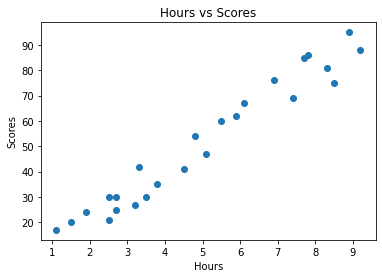

In [4]:
# plotting distribution of scores
plt.title("Hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores)

## From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [5]:
# training the algorithm
regressor=LinearRegression()
regressor.fit(df[['Hours']],df.Scores)

LinearRegression()

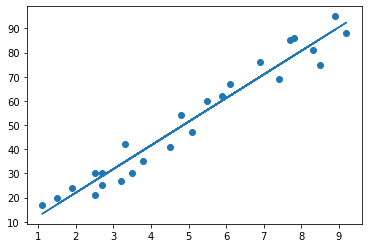

In [6]:
# plotting the regression line
line = regressor.coef_*df.Hours+regressor.intercept_
plt.scatter(df.Hours,df.Scores)
plt.plot(df.Hours,line)

In [7]:
# Comparing Actual vs Predicted Scores
pred=regressor.predict(df[['Hours']])
df1 = pd.DataFrame({'Actual':df.Scores,'Predicted':pred})  
df1.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


### What will be predicted score if a student studies for 9.25 hrs/day?

In [8]:
regressor.coef_

array([9.77580339])

In [9]:
regressor.intercept_

2.48367340537321

In [10]:
# calculating predicted score using y= m x + c 
# where y= m * x + c ,  m = Coefficient , c = Intercept, x = Hours, y = Score
Score= 9.77580339 * 9.25 + 2.48367340537321
Score

92.90985476287321

In [11]:
# calculating predicted score using Linear Regression 
regressor.predict([[9.25]])

C:\Users\Nandkumar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.90985477])

### No of Hours = 9.25
### Predicted Score = 92.90985477

In [12]:
# Evaluating the model using Mean Absolute Error 
print('Mean Absolute Error:', metrics.mean_absolute_error(df.Scores,pred))

Mean Absolute Error: 4.972805319866375


## Thank you!!